<a href="https://colab.research.google.com/github/SamyuktaaS17/Python_Programs/blob/main/NLP_Hope_Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 77.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 103.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 94.9 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=5b61c7c4ddac372c3e25c507465252b04d3c778f6f999d30be140cac39236057
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
!pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.7/250.7 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 100.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 110.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.7/211.7 kB 33.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 24.0 MB/s eta 0:00:00
  Preparing metadata (setup.py

In [ ]:
#For Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sentence_transformers import SentenceTransformer
#ML Algorithms - Naive Bayes, XGBoost, SVM
from sklearn.naive_bayes import MultinomialNB
#from xgboost import XGBClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
#Transformer models
from simpletransformers.classification import ClassificationModel
#To check the performance of these models
from sklearn.metrics import classification_report

In [ ]:
import pandas as pd
import numpy as np
import string
import re
import nltk
from nltk.corpus import stopwords

In [ ]:
import gensim
from gensim.parsing.preprocessing import STOPWORDS
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


df = pd.read_excel('/content/drive/MyDrive/hope_eng_train.csv',sep=',')
df.dropna()
df

Mounted at /content/drive


,Unnamed: 0,Text,labels
0,0,Sourav Kumar RoyChowdhury Comunism is a joke,Non_hope_speech
1,1,It's not about equality,Non_hope_speech
2,2,this is so sweet children are smarter than adu...,Non_hope_speech
3,3,TO GOD ALL LIVES MATTER SO DOES THAT MEAN GOD ...,Non_hope_speech
4,4,Unfortunately life dont matter anymore,Non_hope_speech
...,...,...,...
18187,18187,@Jack HoopernThey're being a smart arse.nnThey...,Non_hope_speech
18188,18188,A conundrum of epic proportions.,Non_hope_speech
18189,18189,jenny llewellyn did you read my comment? I mad...,Non_hope_speech
18190,18190,Can't wait for Karl Marx to come down next,Non_hope_speech


<Axes: >

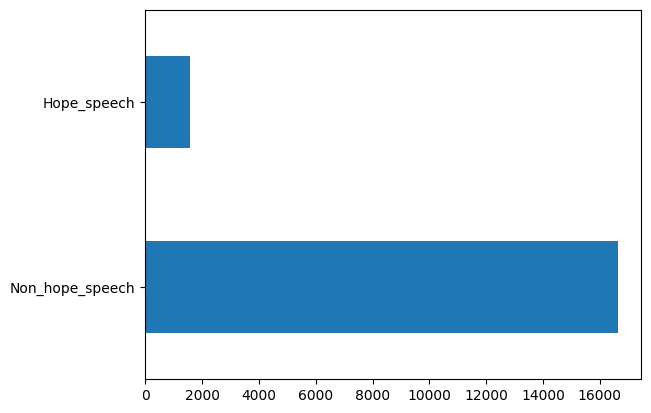

In [ ]:
df['labels'].value_counts().plot(kind='barh')

In [ ]:
word_counts = df['Text'].str.split(expand=True).stack().value_counts()
word_counts

the            8881
to             6491
a              5877
is             5446
and            5243
               ... 
xdnWerrry         1
ptsd              1
IDs               1
police.....       1
offensive🥴        1
Length: 31105, dtype: int64

In [ ]:
df['labels']=df['labels'].replace({'Non_hope_speech':0,'Hope_speech':1})
def removepunctuation(text):
    clean="".join([i for i in text if i not in string.punctuation])
    return clean

df["Text"] = df['Text'].apply(removepunctuation)
df

,Unnamed: 0,Text,labels
0,0,Sourav Kumar RoyChowdhury Comunism is a joke,0
1,1,Its not about equality,0
2,2,this is so sweet children are smarter than adu...,0
3,3,TO GOD ALL LIVES MATTER SO DOES THAT MEAN GOD ...,0
4,4,Unfortunately life dont matter anymore,0
...,...,...,...
18187,18187,Jack HoopernTheyre being a smart arsennThey ar...,0
18188,18188,A conundrum of epic proportions,0
18189,18189,jenny llewellyn did you read my comment I made...,0
18190,18190,Cant wait for Karl Marx to come down next,0


In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

#demo
df['Text']=df['Text'].apply(deEmojify)
df

,Unnamed: 0,Text,labels
0,0,Sourav Kumar RoyChowdhury Comunism is a joke,0
1,1,Its not about equality,0
2,2,this is so sweet children are smarter than adu...,0
3,3,TO GOD ALL LIVES MATTER SO DOES THAT MEAN GOD ...,0
4,4,Unfortunately life dont matter anymore,0
...,...,...,...
18187,18187,Jack HoopernTheyre being a smart arsennThey ar...,0
18188,18188,A conundrum of epic proportions,0
18189,18189,jenny llewellyn did you read my comment I made...,0
18190,18190,Cant wait for Karl Marx to come down next,0


In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
nltk.download('stopwords')
stopwords_list = stopwords.words('english')
stopwords_list.extend(['ena','unaku','per','irukanga','panna','yarum','mattum','ivan','ada','pesa','unakku','k','sari','idhu','vida','vittu','enga','yen','ithu','poda','dey','irundhu','ya','la', 'u','r','s','bro','da','dei','dai','nu','ah','nee','ni','illa','un','ok','na','pls','ur','unga'])
stopwords_list.extend(['🥰','indha','antha','vera','iruka','pola','innum','avan','summa','ellam','thaan','romba','❤️','ana','ama','apdi','ithula','po','evlo','eruku','irukum','nama','enna','va','hi','h','ku','iruku','naa','va','oru','athu','avanga','neenga','tha','en','di','dhan','ne','ella','intha'])
stopwords_list

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def tolower(text):
  return text.lower()
df['Text']=df['Text'].apply(tolower)
df

,Unnamed: 0,Text,labels
0,0,sourav kumar roychowdhury comunism is a joke,0
1,1,its not about equality,0
2,2,this is so sweet children are smarter than adu...,0
3,3,to god all lives matter so does that mean god ...,0
4,4,unfortunately life dont matter anymore,0
...,...,...,...
18187,18187,jack hooperntheyre being a smart arsennthey ar...,0
18188,18188,a conundrum of epic proportions,0
18189,18189,jenny llewellyn did you read my comment i made...,0
18190,18190,cant wait for karl marx to come down next,0


In [ ]:
def removestopwords(text):
  clean = " ".join([word for word in text.split() if word not in stopwords_list])
  return clean

df['Text']=df['Text'].apply(removestopwords)
df

,Unnamed: 0,Text,labels
0,0,sourav kumar roychowdhury comunism joke,0
1,1,equality,0
2,2,sweet children smarter adults lot time,0
3,3,god lives matter mean god racist noooooooooooo...,0
4,4,unfortunately life dont matter anymore,0
...,...,...,...
18187,18187,jack hooperntheyre smart arsennthey hillary su...,0
18188,18188,conundrum epic proportions,0
18189,18189,jenny llewellyn read comment made assumptions ...,0
18190,18190,cant wait karl marx come next,0


In [ ]:
def tokenize(column):
    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]

df['Text'] = df['Text'].astype(str)
df['Tokenized'] = df.apply(lambda x: tokenize(x['Text']), axis=1)
df


,Unnamed: 0,Text,labels,Tokenized
0,0,sourav kumar roychowdhury comunism joke,0,"[sourav, kumar, roychowdhury, comunism, joke]"
1,1,equality,0,[equality]
2,2,sweet children smarter adults lot time,0,"[sweet, children, smarter, adults, lot, time]"
3,3,god lives matter mean god racist noooooooooooo...,0,"[god, lives, matter, mean, god, racist, nooooo..."
4,4,unfortunately life dont matter anymore,0,"[unfortunately, life, dont, matter, anymore]"
...,...,...,...,...
18187,18187,jack hooperntheyre smart arsennthey hillary su...,0,"[jack, hooperntheyre, smart, arsennthey, hilla..."
18188,18188,conundrum epic proportions,0,"[conundrum, epic, proportions]"
18189,18189,jenny llewellyn read comment made assumptions ...,0,"[jenny, llewellyn, read, comment, made, assump..."
18190,18190,cant wait karl marx come next,0,"[cant, wait, karl, marx, come, next]"


In [ ]:
'''def train_bert_model(model,df):
    bert = ClassificationModel('bert', model, num_labels=2, use_cuda=True, args={
    'reprocess_input_data': True,
    'use_cached_eval_features': False,
    'overwrite_output_dir': True,
    'num_train_epochs': 1,
    # 'silent': True
    })
    bert.train_model(df)
    return bert

bert1 = train_bert_model('setu4993/LaBSE',df)
bert1'''

"def train_bert_model(model,df):\n    bert = ClassificationModel('bert', model, num_labels=2, use_cuda=True, args={\n    'reprocess_input_data': True,\n    'use_cached_eval_features': False,\n    'overwrite_output_dir': True,\n    'num_train_epochs': 1,\n    # 'silent': True\n    })\n    bert.train_model(df)\n    return bert\n\nbert1 = train_bert_model('setu4993/LaBSE',df)\nbert1"

In [ ]:
def vocab(df):
  return df.groupby('labels')['Text'].apply(lambda x: Counter(" ".join(x).split()).most_common(100))

In [ ]:
def getVocab(df):
  df_vocab = vocab(df)
  processed = list(set([key for groups in df_vocab for key, value in groups]))
  return processed

In [ ]:
vocab = getVocab(df)
#to eliminate duplicate values
vocab = list(set(vocab))


In [ ]:
tfidf_vec = TfidfVectorizer(analyzer = 'word', vocabulary = vocab)

In [ ]:
labse_embedding_model = SentenceTransformer('sentence-transformers/LaBSE')

In [ ]:
def fitTfidfVectrain(df, tfidf_vec):
  x_df = tfidf_vec.fit_transform(df['Text'])
  return x_df

In [ ]:
def getXtrain(model, df, tfidf_vec):
  #Generate TF-IDF vectors
  model_tf_x = fitTfidfVectrain(df, tfidf_vec)
  #Generate sentence embeddings
  model_val_x = model.encode(df['Text'].tolist())
  #Combining embeddings
  Xval = [np.append(list1, list2) for list1, list2 in zip(model_val_x, model_tf_x.toarray())]
  return Xval

In [ ]:
def fitTfidfVectest(df, tfidf_vec):
  x_df = tfidf_vec.transform(df['Text'])
  return x_df

In [ ]:
def getXtest(model, df, tfidf_vec):
  #Generate TF-IDF vectors
  model_tf_x = fitTfidfVectest(df, tfidf_vec)
  #Generate sentence embeddings
  model_val_x = model.encode(df['Text'].tolist())
  #Combining embeddings
  Xval = [np.append(list1, list2) for list1, list2 in zip(model_val_x, model_tf_x.toarray())]
  return Xval

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/hope_eng_dev.csv',sep=',')
df1

,Unnamed: 0,Text,labels
0,0,Uggghhhhh so vile and ego out of control,Non_hope_speech
1,1,Sometimes i think if they are realy a minority...,Non_hope_speech
2,2,@Ryan 354 ancient egypt no longer exists. And ...,Non_hope_speech
3,3,It means she doesn’t agree with it... everyone...,Non_hope_speech
4,4,@BBC Censored Why do you pretend to know what ...,Non_hope_speech
...,...,...,...
4543,4543,.Sorry NO excuse for vandalism,Non_hope_speech
4544,4544,The bottom line is the statue had too go today...,Non_hope_speech
4545,4545,@Deficere Xand that's right,Non_hope_speech
4546,4546,You can't change the world with hate you just ...,Hope_speech


In [ ]:
df1["Text"] = df1['Text'].apply(removepunctuation)
df1["Text"] = df1['Text'].apply(deEmojify)
df1["Text"] = df1['Text'].apply(tolower)
df1["Text"] = df1['Text'].apply(removestopwords)
df1['labels']=df['labels'].replace({'Non_hope_speech':0,'Hope_speech':1})
df1

,Unnamed: 0,Text,labels
0,0,uggghhhhh vile ego control,0
1,1,sometimes think realy minority,0
2,2,ryan 354 ancient egypt longer exists built slaves,0
3,3,means doesn’t agree everyone opinion,0
4,4,bbc censored pretend know like walk shoes nits...,0
...,...,...,...
4543,4543,sorry excuse vandalism,0
4544,4544,bottom line statue go today ancestors smile lay,0
4545,4545,deficere xand thats right,0
4546,4546,cant change world hate make hate cant change p...,0


In [ ]:
def getY(df):
  return df['labels']

In [ ]:
Xtrain = getXtrain(labse_embedding_model, df, tfidf_vec)
Xtest = getXtest(labse_embedding_model, df1, tfidf_vec)
y_train = getY(df)
y_test = getY(df1)

In [ ]:
baseline_y = [0 for i in range(len(y_test))]

In [ ]:
print(classification_report(y_test, baseline_y))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      4152
           1       0.00      0.00      0.00       396

    accuracy                           0.91      4548
   macro avg       0.46      0.50      0.48      4548
weighted avg       0.83      0.91      0.87      4548



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm_model = svm.SVC(kernel='linear', C=1, verbose=True, probability = True)
svm_model.fit(Xtrain, y_train)

[LibSVM]

SVC(C=1, kernel='linear', probability=True, verbose=True)

In [ ]:
ypred_SVM = svm_model.predict(Xtest)
count1=0;count2=0
for i in ypred_SVM:
  if(i==0):
    count1+=1
  else:
    count2+=1
print("0's are : \n",count1)
print("1's are : \n",count2)


0's are : 
 4471
1's are : 
 77


In [ ]:
print(classification_report(y_test, ypred_SVM))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      4152
           1       0.08      0.02      0.03       396

    accuracy                           0.90      4548
   macro avg       0.50      0.50      0.49      4548
weighted avg       0.84      0.90      0.87      4548



Random Forest

In [ ]:
#RF_classifier = RandomForestClassifier(n_estimators=750,verbose=True, n_jobs=-1, oob_score = True)

In [ ]:
#RF_classifier.fit(Xtrain, y_train)

In [ ]:
'''ypred_RF = RF_classifier.predict(Xtest)
count1=0;count2=0
for i in ypred_RF:
  if(i==0):
    count1+=1
  else:
    count2+=1
print("0's are : \n",count1)
print("1's are : \n",count2)'''


'ypred_RF = RF_classifier.predict(Xtest)\ncount1=0;count2=0\nfor i in ypred_RF:\n  if(i==0):\n    count1+=1\n  else:\n    count2+=1\nprint("0\'s are : \n",count1)\nprint("1\'s are : \n",count2)'

In [ ]:
#print(classification_report(y_test, ypred_RF))

In [ ]:
'''from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(Xtrain, y_train)'''

'from sklearn.naive_bayes import GaussianNB\n\n# Build a Gaussian Classifier\nmodel = GaussianNB()\n\n# Model training\nmodel.fit(Xtrain, y_train)'

In [ ]:
'''ypred_NB = model.predict(Xtest)
count1=0;count2=0
for i in ypred_NB:
  if(i==0):
    count1+=1
  else:
    count2+=1
print("0's are : \n",count1)
print("1's are : \n",count2)'''


'ypred_NB = model.predict(Xtest)\ncount1=0;count2=0\nfor i in ypred_NB:\n  if(i==0):\n    count1+=1\n  else:\n    count2+=1\nprint("0\'s are : \n",count1)\nprint("1\'s are : \n",count2)'

In [ ]:
#print(classification_report(y_test, ypred_NB))

In [ ]:
'''from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(Xtrain,y_train)'''


'from sklearn.linear_model import LogisticRegression\n\nlr=LogisticRegression()\nlr.fit(Xtrain,y_train)'

In [ ]:
'''ypred_LR = model.predict(Xtest)
count1=0;count2=0
for i in ypred_LR:
  if(i==0):
    count1+=1
  else:
    count2+=1
print("0's are : \n",count1)
print("1's are : \n",count2)'''

'ypred_LR = model.predict(Xtest)\ncount1=0;count2=0\nfor i in ypred_LR:\n  if(i==0):\n    count1+=1\n  else:\n    count2+=1\nprint("0\'s are : \n",count1)\nprint("1\'s are : \n",count2)'

In [ ]:
#print(classification_report(y_test, ypred_LR))

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Hope_eng_test_without_labels.csv',sep=',')
df_test.rename(columns={'Texts':'Text'},inplace=True)
df_test["Text"] = df_test['Text'].apply(removepunctuation)
df_test["Text"] = df_test['Text'].apply(deEmojify)
df_test["Text"] = df_test['Text'].apply(tolower)
df_test["Text"] = df_test['Text'].apply(removestopwords)
df_test

,Text
0,lgbtq means lets get biden quit plus kamala ag...
1,israeli hebrew women prestigious heritage one ...
2,oh dont tell lesbian start like lol
3,totally bullshit 🤢🤮
4,support
...,...
4800,dying
4801,underrated body language gestures
4802,thinks gay activist means advocating people be...
4803,guy enemy team halo 3 camps bubble shield shot...


In [ ]:
Xtest = getXtest(labse_embedding_model, df_test, tfidf_vec)
ypred = svm_model.predict(Xtest)
reverse_key = {0:'Non_hope_speech',1:'Hope_speech'}

In [ ]:
result = pd.DataFrame(df_test['Text'])
result['labels'] = ypred.tolist()
result['labels'] = result['labels'].map(reverse_key)
result




yhat=result['labels']

In [ ]:
#from google.colab import files

In [ ]:
#result.to_csv("classified_output.tsv", sep='\t', index=False, header=None)

In [ ]:
#files.download("classified_output.tsv")

In [ ]:
df1_test = pd.read_csv('/content/drive/MyDrive/Hope_eng_test.csv',sep=',')


In [ ]:
df1_test['Labels']=df1_test['Labels'].replace({'Non_hope_speech':0,'hope-speech':1})
yact=df1_test['Labels']

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
score = accuracy_score(yact, ypred)
score

0.99105098855359

In [ ]:
print(classification_report(yact, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4784
           1       0.00      0.00      0.00        21

    accuracy                           0.99      4805
   macro avg       0.50      0.50      0.50      4805
weighted avg       0.99      0.99      0.99      4805

